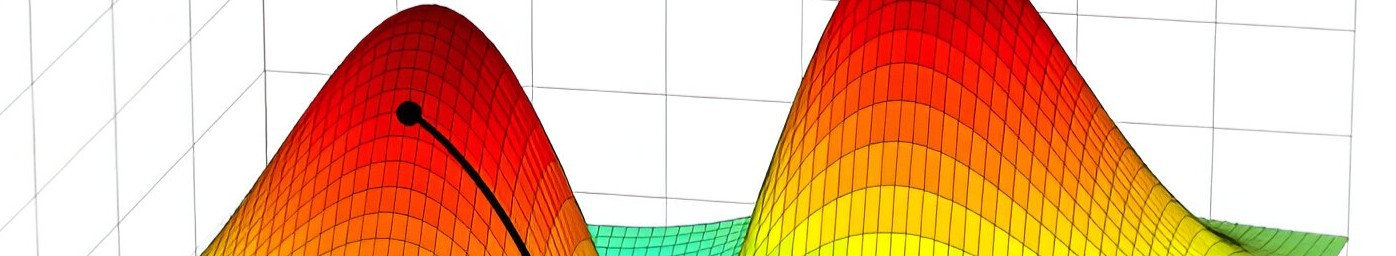

# Solución - Con Metaheurística - Caso base, proyecto A caso 2 y caso 3 

En este notebook se obtienen los resultados de la implementación de la meteheurística, y se guardan los archivos de verificación en la carpeta "resultados".

La explicación del código y su implementación se encuentra en el archivo MOS_P1_3.ipynb


 Solving caso_base...
Precomputing distances...
Distances computed.

Tiempo total: 9.17 s
Memoria inicial: 35.32 MB
Memoria final:   122.21 MB
Total Cost (fitness): 747,557.64

CSV guardado en: resultados/metaheuristica\verificacion_metaheuristica_GA_caso_base.csv

--- COSTOS POR VEHÍCULO ---

Vehículo 1 | Ruta: [4, 15, 1, 16, 10, 24, 11, 9]
  Distancia: 53.53 km | Tiempo: 2.36 h | Combustible: 29082 COP | Fijo: 50000 COP
  Costo total: 230,802.21 COP

Vehículo 2 | Ruta: [8, 5, 18, 2, 12, 20]
  Distancia: 36.64 km | Tiempo: 1.61 h | Combustible: 19910 COP | Fijo: 50000 COP
  Costo total: 173,778.06 COP

Vehículo 3 | Ruta: [13, 22, 17, 6, 14]
  Distancia: 35.64 km | Tiempo: 1.57 h | Combustible: 19365 COP | Fijo: 50000 COP
  Costo total: 170,391.27 COP

Vehículo 4 | Ruta: [23, 3, 19, 7, 21]
  Distancia: 36.29 km | Tiempo: 1.60 h | Combustible: 19718 COP | Fijo: 50000 COP
  Costo total: 172,586.11 COP

Costo total de todas las rutas: 747,557.64 COP


C:\Users\mauri\AppData\Local\Temp\ipykernel_10912\2875913671.py:297: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_sol))


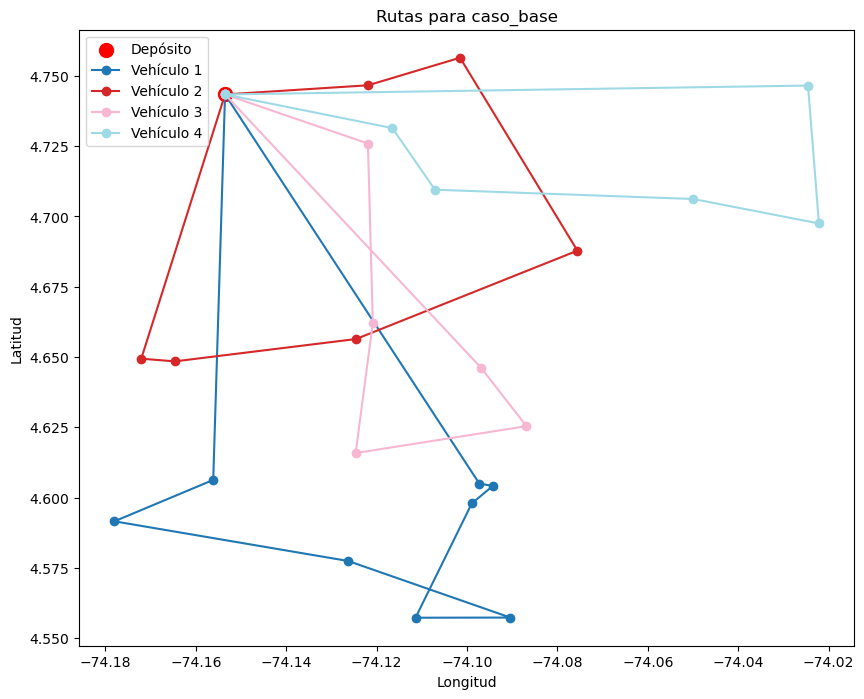

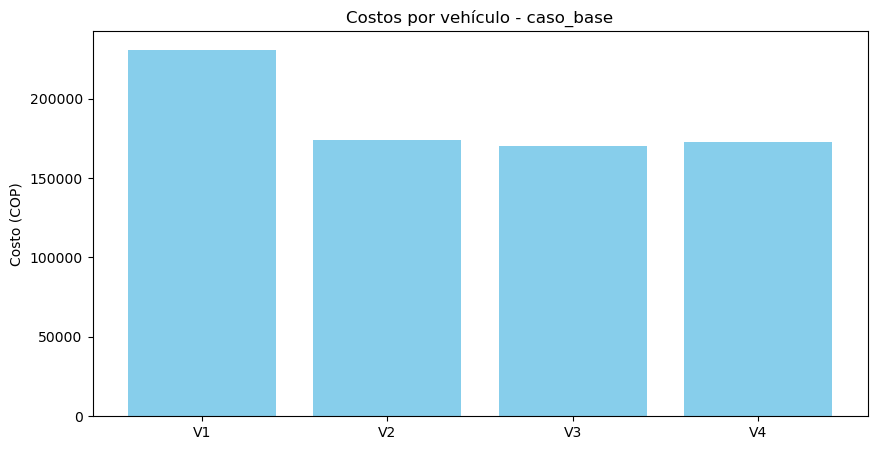


 Solving caso_2...
Precomputing distances...
Distances computed.

Tiempo total: 6.46 s
Memoria inicial: 126.77 MB
Memoria final:   126.85 MB
Total Cost (fitness): 228,541.52

CSV guardado en: resultados/metaheuristica\verificacion_metaheuristica_GA_caso_2.csv

--- COSTOS POR VEHÍCULO ---

Vehículo 1 | Ruta: [5, 3, 8, 7, 9, 2, 1, 4, 6]
  Distancia: 52.86 km | Tiempo: 2.33 h | Combustible: 28719 COP | Fijo: 50000 COP
  Costo total: 228,541.52 COP

Costo total de todas las rutas: 228,541.52 COP


C:\Users\mauri\AppData\Local\Temp\ipykernel_10912\2875913671.py:297: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_sol))


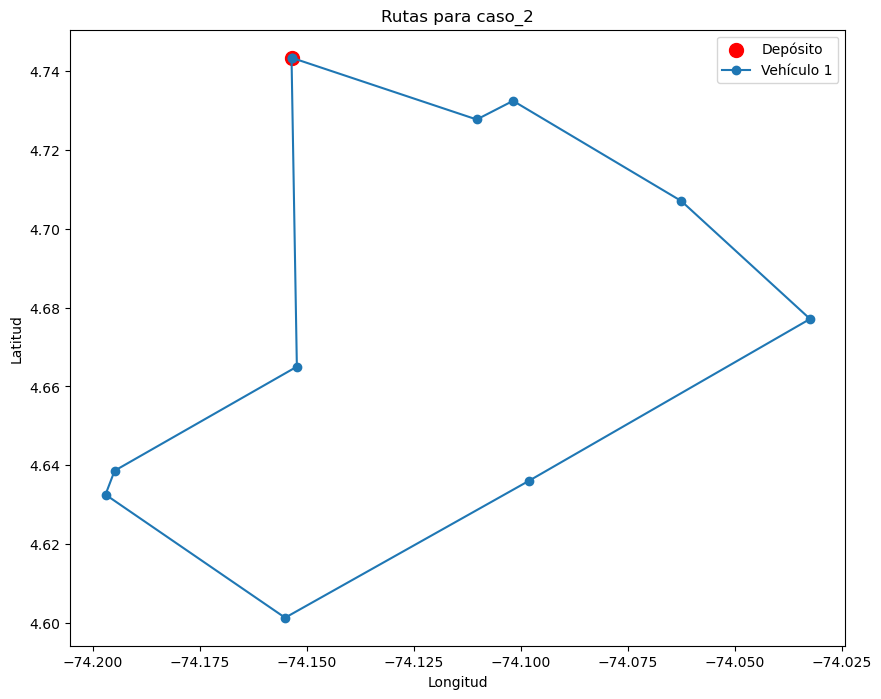

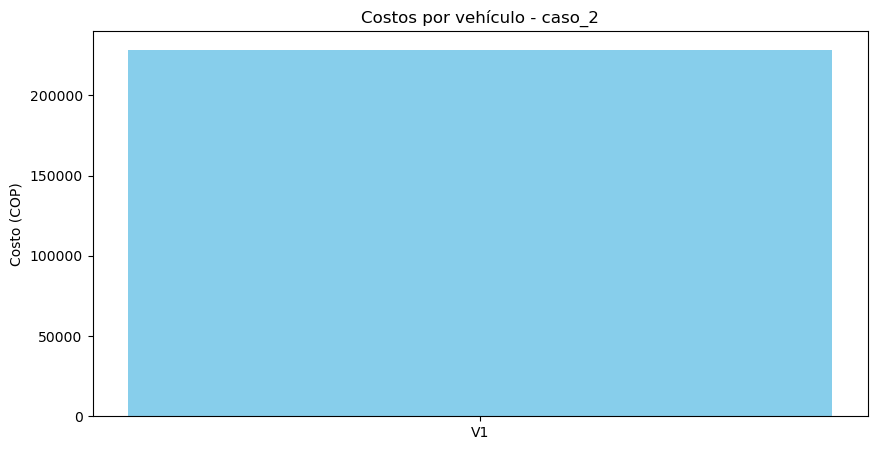


 Solving caso_3...
Precomputing distances...
Distances computed.

Tiempo total: 40.53 s
Memoria inicial: 131.26 MB
Memoria final:   126.18 MB
Total Cost (fitness): 4,225,556.35

CSV guardado en: resultados/metaheuristica\verificacion_metaheuristica_GA_caso_3.csv

--- COSTOS POR VEHÍCULO ---

Vehículo 1 | Ruta: [67, 57, 14, 90, 8, 64, 71, 31, 77]
  Distancia: 91.58 km | Tiempo: 4.03 h | Combustible: 49760 COP | Fijo: 50000 COP
  Costo total: 359,349.91 COP

Vehículo 2 | Ruta: [44, 55]
  Distancia: 23.36 km | Tiempo: 1.03 h | Combustible: 12691 COP | Fijo: 50000 COP
  Costo total: 128,897.42 COP

Vehículo 3 | Ruta: [41, 6, 30, 13, 85, 87, 89, 26]
  Distancia: 92.81 km | Tiempo: 4.09 h | Combustible: 50428 COP | Fijo: 50000 COP
  Costo total: 363,502.07 COP

Vehículo 4 | Ruta: [62, 15, 3, 73, 70, 53, 35]
  Distancia: 65.05 km | Tiempo: 2.86 h | Combustible: 35344 COP | Fijo: 50000 COP
  Costo total: 269,730.40 COP

Vehículo 5 | Ruta: [39, 58, 76, 46, 75, 79]
  Distancia: 95.37 km | Tiemp

C:\Users\mauri\AppData\Local\Temp\ipykernel_10912\2875913671.py:297: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_sol))


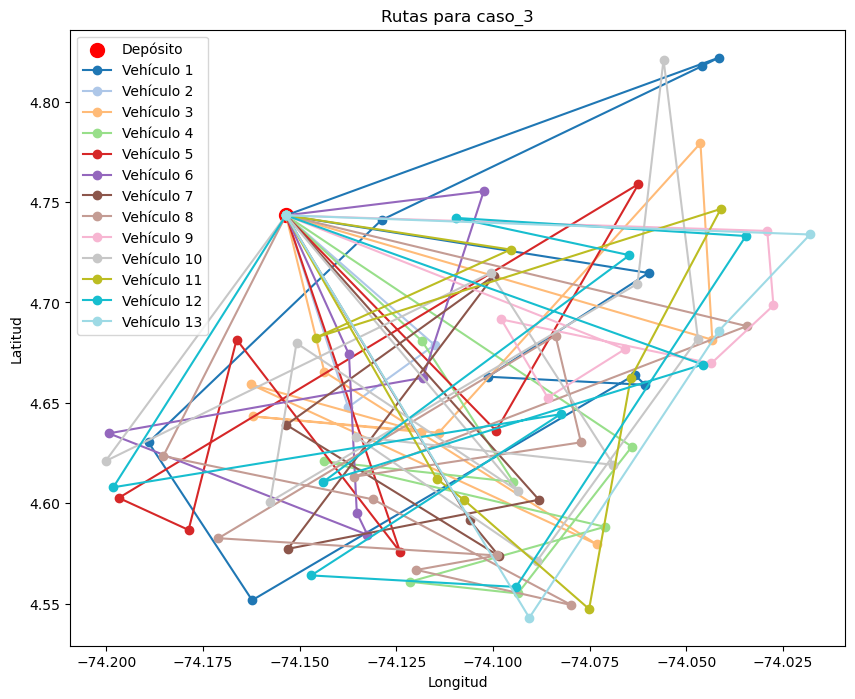

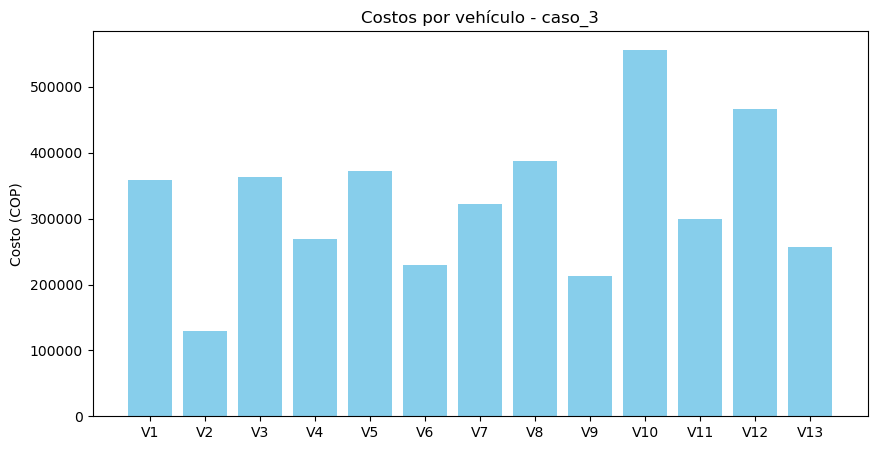

In [9]:
import pandas as pd
import numpy as np
import random
import math
import os
from copy import deepcopy
import time
import psutil
import matplotlib.pyplot as plt

# --- Constants ---
SPEED_KMH = 22.72
R_EARTH_KM = 6371.0

# ============================================================
# Helper Functions
# ============================================================

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R_EARTH_KM * c

def load_data(folder_path):
    clients_df = pd.read_csv(os.path.join(folder_path, 'clients.csv'))
    depots_df = pd.read_csv(os.path.join(folder_path, 'depots.csv'))
    depot = depots_df.iloc[0]
    vehicles_df = pd.read_csv(os.path.join(folder_path, 'vehicles.csv'))
    return clients_df, depot, vehicles_df

# ============================================================
# Genetic Algorithm
# ============================================================

class GeneticAlgorithmCVRP:

    def __init__(self, clients_df, depot, vehicles_df, params, 
                 population_size=100, generations=500, mutation_rate=0.2, 
                 crossover_rate=0.8, elitism_rate=0.1, tournament_size=5):

        self.clients_df = clients_df
        self.depot = depot
        self.vehicles_df = vehicles_df.sort_values(by='Capacity', ascending=False).reset_index(drop=True)
        self.params = params
        
        self.clients = clients_df['ClientID'].tolist()
        self.demands = dict(zip(clients_df['ClientID'], clients_df['Demand']))
        self.coords = dict(zip(clients_df['ClientID'], zip(clients_df['Latitude'], clients_df['Longitude'])))
        self.depot_coords = (depot['Latitude'], depot['Longitude'])
        self.depot_id = depot["DepotID"]

        self.fleet_ids = vehicles_df["VehicleID"].tolist()
        self.fleet_capacities = vehicles_df["Capacity"].tolist()
        self.num_vehicles = len(self.fleet_capacities)
        
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.elitism_rate = elitism_rate
        self.tournament_size = tournament_size

        self.population = []
        self.best_solution = None
        self.best_fitness = float("inf")

        self.dist_matrix = {}
        self._precompute_distances()

    def _precompute_distances(self):
        print("Precomputing distances...")
        for cid in self.clients:
            c_lat, c_lon = self.coords[cid]
            d = haversine_distance(self.depot_coords[0], self.depot_coords[1], c_lat, c_lon)
            self.dist_matrix[(0, cid)] = d
            self.dist_matrix[(cid, 0)] = d

        for i in range(len(self.clients)):
            for j in range(i+1, len(self.clients)):
                c1, c2 = self.clients[i], self.clients[j]
                d = haversine_distance(self.coords[c1][0], self.coords[c1][1],
                                       self.coords[c2][0], self.coords[c2][1])
                self.dist_matrix[(c1, c2)] = d
                self.dist_matrix[(c2, c1)] = d
        print("Distances computed.")

    def get_distance(self, a, b):
        if a == b: return 0.0
        return self.dist_matrix.get((a, b), 0.0)

    # --- GA Core ---

    def initialize_population(self):
        self.population = []
        for _ in range(self.population_size):
            self.population.append(self._create_random_solution())

    def _create_random_solution(self):
        shuffled = self.clients.copy()
        random.shuffle(shuffled)
        k = random.randint(1, self.num_vehicles)
        routes = [[] for _ in range(k)]
        for i, c in enumerate(shuffled):
            routes[i % k].append(c)
        return routes

    def evaluate_fitness(self, solution):
        route_demands = [(sum(self.demands[c] for c in r), r) for r in solution]
        route_demands.sort(reverse=True)

        if len(solution) > self.num_vehicles:
            return 1e12

        capacity_penalty = 0.0
        total_dist = 0.0

        for i, (demand, route) in enumerate(route_demands):
            cap = self.fleet_capacities[i]
            if demand > cap:
                capacity_penalty += (demand - cap) * 1e6
            if not route: 
                continue
            total_dist += self.get_distance(0, route[0])
            for j in range(len(route)-1):
                total_dist += self.get_distance(route[j], route[j+1])
            total_dist += self.get_distance(route[-1], 0)

        c_dist = self.params.get("C_dist", 0)
        c_time = self.params.get("C_time", 0)
        c_fixed = self.params.get("C_fixed", 0)
        fuel_price = self.params.get("fuel_price", 0)
        fuel_eff = self.params.get("fuel_efficiency_typical", 1)

        cost_dist = total_dist * c_dist
        cost_time = (total_dist / SPEED_KMH) * c_time
        cost_fuel = total_dist * (fuel_price / fuel_eff)
        cost_fixed = len(solution) * c_fixed

        return cost_dist + cost_time + cost_fuel + cost_fixed + capacity_penalty

    # --- GA Operators ---

    def select_parents(self):
        def tournament():
            participants = random.sample(self.population, self.tournament_size)
            return min(participants, key=lambda x: self.evaluate_fitness(x))
        return tournament(), tournament()

    def crossover(self, p1, p2):
        gt1 = [c for r in p1 for c in r]
        gt2 = [c for r in p2 for c in r]
        size = len(gt1)
        a, b = sorted(random.sample(range(size), 2))
        def ox(A, B):
            child = [None]*size
            child[a:b+1] = A[a:b+1]
            pos = (b+1) % size
            idx = (b+1) % size
            while None in child:
                if B[idx] not in child:
                    child[pos] = B[idx]
                    pos = (pos+1) % size
                idx = (idx+1) % size
            return child
        c1 = self._split_giant_tour(ox(gt1, gt2))
        c2 = self._split_giant_tour(ox(gt2, gt1))
        return c1, c2

    def _split_giant_tour(self, tour):
        routes = []
        caps = self.fleet_capacities.copy()
        random.shuffle(caps)
        idx = 0
        for cap in caps:
            load = 0
            route = []
            while idx < len(tour) and load + self.demands[tour[idx]] <= cap:
                route.append(tour[idx])
                load += self.demands[tour[idx]]
                idx += 1
            if route:
                routes.append(route)
        if idx < len(tour):
            routes[-1].extend(tour[idx:])
        return routes

    def mutate(self, sol):
        if random.random() >= self.mutation_rate: return sol
        if not sol: return sol
        t = random.choice(["swap", "move"])
        if t == "swap":
            r1 = random.randint(0, len(sol)-1)
            r2 = random.randint(0, len(sol)-1)
            if sol[r1] and sol[r2]:
                i = random.randint(0, len(sol[r1])-1)
                j = random.randint(0, len(sol[r2])-1)
                sol[r1][i], sol[r2][j] = sol[r2][j], sol[r1][i]
        else:  
            r1 = random.randint(0, len(sol)-1)
            r2 = random.randint(0, len(sol)-1)
            if sol[r1] and r1 != r2:
                i = random.randint(0, len(sol[r1])-1)
                elem = sol[r1].pop(i)
                j = random.randint(0, len(sol[r2]))
                sol[r2].insert(j, elem)
                if not sol[r1]:
                    sol.pop(r1)
        return sol

    # --- Solve ---

    def evolve(self):
        scored = [(s, self.evaluate_fitness(s)) for s in self.population]
        scored.sort(key=lambda x: x[1])
        if scored[0][1] < self.best_fitness:
            self.best_fitness = scored[0][1]
            self.best_solution = deepcopy(scored[0][0])
        elite = max(1, int(self.population_size * self.elitism_rate))
        new_pop = [deepcopy(s[0]) for s in scored[:elite]]
        while len(new_pop) < self.population_size:
            p1, p2 = self.select_parents()
            c1, c2 = self.crossover(p1, p2)
            new_pop.append(self.mutate(c1))
            if len(new_pop) < self.population_size:
                new_pop.append(self.mutate(c2))
        self.population = new_pop

    def solve(self):
        self.initialize_population()
        for _ in range(self.generations):
            self.evolve()
        return self.best_solution, self.best_fitness

# ============================================================
# Post-processing
# ============================================================

def compute_route_stats(route, ga):
    if not route: return 0,0,0,0
    d_total = ga.get_distance(0, route[0])
    for i in range(len(route)-1):
        d_total += ga.get_distance(route[i], route[i+1])
    d_total += ga.get_distance(route[-1], 0)
    demand_total = sum(ga.demands[c] for c in route)
    time_total = d_total / SPEED_KMH
    fuel_price = ga.params["fuel_price"]
    fuel_efficiency = ga.params["fuel_efficiency_typical"]
    fuel_cost = d_total * (fuel_price / fuel_efficiency)
    return d_total, time_total, fuel_cost, demand_total

def save_metaheuristic_csv(case_name, ga, best_sol):
    out_dir = "resultados/metaheuristica"
    os.makedirs(out_dir, exist_ok=True)
    filename = f"verificacion_metaheuristica_GA_{case_name}.csv"
    filepath = os.path.join(out_dir, filename)
    rows = []
    for i, route in enumerate(best_sol):
        v_id = ga.fleet_ids[i]
        d_id = ga.depot_id
        d, t, fuel, load = compute_route_stats(route, ga)
        rows.append([
            v_id,
            d_id,
            load,
            "-".join([str(d_id)] + [str(c) for c in route] + [str(d_id)]),
            len(route),
            "-".join(str(ga.demands[c]) for c in route),
            round(d, 6),
            round(t, 6),
            round(fuel, 6)
        ])
    df = pd.DataFrame(rows, columns=[
        "VehicleId","DepotId","InitialLoad","RouteSequence",
        "ClientsServed","DemandsSatisfied","TotalDistance","TotalTime","FuelCost"
    ])
    df.to_csv(filepath, index=False)
    print(f"\nCSV guardado en: {filepath}")
    return filepath

def print_costs_by_vehicle(ga, best_sol):
    total_cost = 0
    print("\n--- COSTOS POR VEHÍCULO ---")
    for i, route in enumerate(best_sol):
        d, t, fuel, load = compute_route_stats(route, ga)
        cost = d*ga.params['C_dist'] + t*ga.params['C_time'] + fuel + ga.params['C_fixed']
        total_cost += cost
        print(f"\nVehículo {i+1} | Ruta: {route}")
        print(f"  Distancia: {d:.2f} km | Tiempo: {t:.2f} h | Combustible: {fuel:.0f} COP | Fijo: {ga.params['C_fixed']} COP")
        print(f"  Costo total: {cost:,.2f} COP")
    print(f"\nCosto total de todas las rutas: {total_cost:,.2f} COP")

def plot_routes(ga, best_sol, case_name):
    plt.figure(figsize=(10,8))
    colors = plt.cm.get_cmap('tab20', len(best_sol))
    plt.scatter(ga.depot_coords[1], ga.depot_coords[0], c='red', s=100, label='Depósito')
    for i, route in enumerate(best_sol):
        lats = [ga.depot_coords[0]] + [ga.coords[c][0] for c in route] + [ga.depot_coords[0]]
        lons = [ga.depot_coords[1]] + [ga.coords[c][1] for c in route] + [ga.depot_coords[1]]
        plt.plot(lons, lats, color=colors(i), marker='o', label=f'Vehículo {i+1}')
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.title(f"Rutas para {case_name}")
    plt.legend()
    plt.show()

def plot_costs_by_vehicle(ga, best_sol, case_name):
    costs = []
    for route in best_sol:
        d, t, fuel, load = compute_route_stats(route, ga)
        cost = d*ga.params['C_dist'] + t*ga.params['C_time'] + fuel + ga.params['C_fixed']
        costs.append(cost)
    plt.figure(figsize=(10,5))
    plt.bar([f"V{i+1}" for i in range(len(best_sol))], costs, color='skyblue')
    plt.ylabel("Costo (COP)")
    plt.title(f"Costos por vehículo - {case_name}")
    plt.show()

# ============================================================
# MAIN
# ============================================================

if __name__ == "__main__":

    # Parámetros fijos
    params_default = {
        "fuel_price": 16300,             # COP/gallon
        "fuel_efficiency_typical": 30,   # km/gallon
        "C_fixed": 50000,                # COP/vehicle
        "C_dist": 2500,                  # COP/km
        "C_time": 7600                   # COP/hour
    }

    base_path = r"cvrp_content-main"
    cases = ["caso_base", "caso_2", "caso_3"]

    for case in cases:
        print("\n======================")
        print(f" Solving {case}...")
        print("======================")

        case_path = os.path.join(base_path, case)
        clients_df, depot, vehicles_df = load_data(case_path)

        process = psutil.Process(os.getpid())
        mem_start = process.memory_info().rss / 1024**2
        t_start = time.time()

        ga = GeneticAlgorithmCVRP(
            clients_df, depot, vehicles_df, params_default,
            population_size=150,
            generations=300,
            mutation_rate=0.3
        )

        best_sol, best_fit = ga.solve()

        t_end = time.time()
        mem_end = process.memory_info().rss / 1024**2

        print(f"\nTiempo total: {t_end - t_start:.2f} s")
        print(f"Memoria inicial: {mem_start:.2f} MB")
        print(f"Memoria final:   {mem_end:.2f} MB")
        print(f"Total Cost (fitness): {best_fit:,.2f}")

        # Guardar CSV
        save_metaheuristic_csv(case, ga, best_sol)

        # Imprimir costos por vehículo
        print_costs_by_vehicle(ga, best_sol)

        # Graficar rutas y costos
        plot_routes(ga, best_sol, case)
        plot_costs_by_vehicle(ga, best_sol, case)
